# Metadata survey

This notebook reports the number of volume-slices we have bearing various genre tags, in specified periods.

In [10]:
# First, some standard imports.

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [11]:
# Read in master metadata, and create a column of sets
# that can be used for genre checking.

md = pd.read_csv('mastermetadata.csv')

def tags2tagset(x):
    ''' function that will be applied to transform
    fantasy|science-fiction into {'fantasy', 'science-fiction'} '''
    if type(x) == float:
        return set()
    else:
        return set(x.split('|'))

column_of_sets = md['tags'].apply(tags2tagset)
md = md.assign(tagset = column_of_sets)

## Let's get that data!

In [12]:
thresholds = [1800, 1850, 1898, 1920, 1950, 1970, 1980, 1990, 2000, 2010]

dfrows = []

for i in range(1, len(thresholds)):
    
    floor = thresholds[i-1]
    ceiling = thresholds[i]
    period = md[(md.firstpub >= floor) & (md.firstpub < ceiling)]
    # we get rows between a pair of thresholds
    # as often in Python, only the bottom limit is inclusive
    
    fantasy = 0
    scifi = 0
    both = 0
    ran = 0
    juv = 0
    
    for idx, row in period.iterrows():
        t = row['tagset']
        genrecount = 0
        if ('fantasy_loc' in t) | ('fantasy_oclc' in t) & ('juv' not in t):
            fantasy += 1
            genrecount += 1
        if ('sf_loc' in t) | ('sf_oclc' in t) & ('juv' not in t):
            scifi += 1
            genrecount += 1
        if 'random' in t:
            ran += 1
        if 'juv' in t:
            juv += 1
        
        if genrecount == 2:
            both += 1
    
    dfrow = dict()
    dfrow['floor'] = floor
    dfrow['ceiling'] = ceiling
    dfrow['scifi'] = scifi
    dfrow['fantasy'] = fantasy
    dfrow['random'] = ran
    dfrow['juv%'] = (juv * 100) / (scifi + ran + fantasy)
    dfrow['overlap%'] = (both * 100) / (scifi + fantasy)
    
    dfrows.append(dfrow)
    
df = pd.DataFrame(dfrows)
columnorder = ['floor', 'ceiling', 'random', 'scifi', 'fantasy', 'overlap%', 'juv%']
df = df[columnorder]

In [13]:
df

,floor,ceiling,random,scifi,fantasy,overlap%,juv%
0,1800,1850,44,6,8,0.000000,1.724138
1,1850,1898,132,95,70,6.060606,9.427609
2,1898,1920,98,105,78,3.825137,11.032028
3,1920,1950,138,128,86,6.542056,3.977273
4,1950,1970,193,199,112,4.823151,2.579365
5,1970,1980,101,99,80,2.793296,0.714286
6,1980,1990,95,97,97,2.061856,0.692042
7,1990,2000,99,91,97,3.191489,0.000000
8,2000,2010,92,100,86,5.913978,0.719424


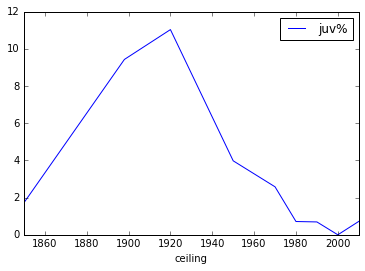

In [14]:
df.plot('ceiling', 'juv%')
plt.show()

#### juvenile fiction

You can see why I ended up having to exclude juvenile fiction. It clustered in a single period, for reasons that I think are shaped by the sampling method rather than the history of genre. What you can't see here is that it also clustered in fantasy rather heavily, and was particularly sparse in SF. It's a tricky problem, because I think the fantasy-children's lit connection is not adventitious. It's a fairly deep fact about the nature of fantasy. So I tried to use a light hand. I did not remove books that might be considered YA or that are widely enjoyed by adults. It's a debatable topic, however, and critics of this research will be welcome to debate it. We can also still run the scripts *without* excluding children's lit, to see what difference it makes. I haven't deleted anything; just assigned things tag that allowed them to be excluded from the calculations provisionally.

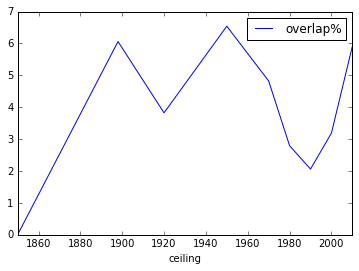

In [15]:
df.plot('ceiling', 'overlap%')
plt.show()

#### overlap

Volumes that are tagged *both* SF and fantasy also potentially pose a problem. But here, even more than with children's lit, it seems to be a problem integral to the questions we are pursuing. So I haven't done anything to exclude these volumes from the experiment. Instead, typically, I allow them to be assigned to one genre or the other *randomly* each time a test is run. And then I run the test lots of times!

#### other genres

There is also some detective fiction in the dataset, as well as science fiction tagged by James O Bailey, and supernatural fiction tagged by Dorothy Scarborough.

In [18]:
supernat = md[md['tagset'].map(lambda tagset: 'supernat' in tagset)]
print("Supernatural fiction: " + str(supernat.shape[0]) + " volume slices")
print("from " + str(min(supernat.firstpub)) + " to " + str(max(supernat.firstpub)))
print()
detect = md[md['tagset'].map(lambda tagset: 'detective' in tagset)]
print("Detective fiction: " + str(detect.shape[0]) + " volume slices")
print("from " + str(min(detect.firstpub)) + " to " + str(max(detect.firstpub)))
print()
bailey = md[md['tagset'].map(lambda tagset: 'sf_bailey' in tagset)]
print("Scientific fiction from Bailey's 1934 diss: " + str(bailey.shape[0]) + " volume slices")
print("from " + str(min(bailey.firstpub)) + " to " + str(max(bailey.firstpub)))
print()
randB = md[md['tagset'].map(lambda tagset: 'randomB' in tagset)]
print("A secondary random set for method experiments: " + str(randB.shape[0]) + " volume slices")
print("from " + str(min(randB.firstpub)) + " to " + str(max(randB.firstpub)))

Supernatural fiction: 74 volume slices
from 1806 to 1921

Detective fiction: 174 volume slices
from 1829 to 1922

Scientific fiction from Bailey's 1934 diss: 91 volume slices
from 1806 to 1914

A secondary random set for method experiments: 239 volume slices
from 1812 to 1929


In [17]:
len(set(md.htid))

1547